<a href="https://colab.research.google.com/github/AdrianaLegalReis/Cachorros/blob/main/MVP_Classifica%C3%A7%C3%A3o_de_Ra%C3%A7as_Caninas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Sprint II - Deep Learning

## Adriana Legal Reis

### MVP de Visão Computacional para Classificação de Raças Caninas

## 1. Definição do Problema


**Classificação de Raças Caninas com Tensorflow - Xception**

O conjunto de dados consiste em uma coleção de imagens de diferentes raças de cães obtidas da web. Essas imagens foram disponibilizadas na página https://www.kaggle.com/datasets/gpiosenka/70-dog-breedsimage-data-set?resource=download. Cada imagem retrata uma raça de cão distinta com diferentes características físicas, como tamanho, forma, cor e tipo de pelo. É importante ressaltar que as imagens foram coletadas de várias fontes on-line, resultando em variações em qualidade, resolução e orientação.

Nosso objetivo é utilizar esse conjunto de dados para desenvolver um projeto de visão computacional e aprendizado de máquina, voltado para reconhecimento de imagens, detecção de objetos e classificação. As imagens serão empregadas no treinamento e teste de modelos de aprendizado de máquina, a fim de identificar e classificar com precisão as diferentes raças de cães.

Destaca-se que o conjunto de dados abrange uma ampla gama de raças de cães, sendo que cada raça é representada por múltiplas imagens capturadas a partir de diferentes ângulos e poses. Essa abordagem busca capturar o máximo de informações sobre as características físicas específicas de cada raça.

## 2. Carga de Dados

Importação dos pacotes que iremos utilizar no projeto.

In [2]:
# importações

import os
import shutil
import random
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
import joblib
from google.colab import drive
import pickle
from PIL import Image

**Organização dos dados para treinamento de rede neural**

Para criar três listas de dados (train, valid e test), iremos clonar os diretórios contendo as imagens que foram inseridas e disponibilizadas no GitHub para o ambiente do Colab.

In [3]:
# Para remover o diretório caso ele já tenha sido clonado no Colab
!rm -r /content/Cachorros/
# Copia as imagens para o Colab
!git clone https://github.com/AdrianaLegalReis/Cachorros.git

rm: cannot remove '/content/Cachorros/': No such file or directory
Cloning into 'Cachorros'...
remote: Enumerating objects: 9934, done.
remote: Counting objects: 100% (479/479), done.
remote: Compressing objects: 100% (463/463), done.
remote: Total 9934 (delta 26), reused 450 (delta 16), pack-reused 9455
Receiving objects: 100% (9934/9934), 221.70 MiB | 44.28 MiB/s, done.
Resolving deltas: 100% (326/326), done.
Updating files: 100% (9351/9351), done.


## 3. **Desenvolvimento de Modelo**

**Arquitetura Xception**

O Xception é um modelo de rede neural convolucional (CNN) que foi introduzido em um artigo de pesquisa intitulado "Xception: Deep Learning with Depthwise Separable Convolutions", escrito por François Chollet, em 2016. O termo "Xception" é uma combinação das palavras "Extreme" (extremo) e "Exception" (exceção), indicando uma versão aprimorada e excepcional de redes convolucionais.

O Xception é baseado no conceito de convoluções separáveis em profundidade (depthwise separable convolutions), que é uma variação eficiente das convoluções tradicionais. Em vez de aplicar convoluções 2D padrão em cada camada de entrada, o Xception realiza convoluções separáveis em duas etapas: uma convolução separável em profundidade seguida de uma convolução 1x1 para combinar as características.

Esse design inovador ajuda a reduzir significativamente a quantidade de parâmetros e a carga computacional do modelo, ao mesmo tempo em que mantém ou até melhora o desempenho em tarefas de visão computacional, como classificação de imagens, detecção de objetos e segmentação semântica.

O Xception é construído com base na arquitetura do Inception v3, que também é uma rede neural convolucional amplamente utilizada. No entanto, o Xception leva a abordagem do Inception um passo adiante, substituindo as convoluções padrão por convoluções separáveis em profundidade para obter melhores resultados em termos de eficiência e desempenho.

Graças à sua arquitetura inovadora, o Xception se tornou uma opção popular para tarefas de visão computacional e é amplamente utilizado como uma rede pré-treinada para transferência de aprendizado (transfer learning) em muitas aplicações.

**Modelo de Dados**

Para criar o modelo, realizamos a divisão do conjunto de dados em três diretórios distintos: train, valid e test. Essa divisão é uma prática comum no aprendizado de máquina, pois permite treinar, validar e avaliar o modelo de forma adequada.

O diretório train foi utilizado para treinar o modelo, ou seja, foi nele que ocorreu o processo de aprendizado e ajuste dos parâmetros do modelo. Já o diretório valid foi reservado para a validação do modelo durante o treinamento. Essa etapa permite acompanhar o desempenho do modelo em dados não utilizados durante o treinamento e ajustar os hiperparâmetros de acordo.

Por fim, o diretório test foi utilizado como um conjunto de dados não vistos pelo modelo durante o treinamento e validação. Essa parte do conjunto de dados é reservada para a avaliação final do modelo, fornecendo uma estimativa de sua capacidade de generalização para dados novos e desconhecidos.

Ao dividir os dados em diretórios separados, garantimos que o modelo seja avaliado de maneira rigorosa e imparcial, evitando a memorização dos dados de treinamento e verificando sua habilidade de generalização para situações reais.

In [4]:
# Define o initial path
initial_path = '/content/Cachorros'

# Define os nomes dos diretórios
directories = ['train', 'valid', 'test']

# Define os nomes dos subdiretorios para cada diretório
subdirectories = ['Afghan','African Wild Dog','Airedale','American Spaniel','American Hairless','Basenji','Basset','Beagle','Bearded Collie','Bermaise','Bichon Frise','Blenheim','Bloodhound','Bluetick','Border Collie','Borzoi','Boston Terrier','Boxer','Bull Mastiff','Bull Terrier','Bulldog','Cairn','Chihuahua','Chinese Crested','Chow','Clumber','Cockapoo','Cocker','Collie','Corgi','Coyote','Dalmation','Dhole','Dingo','Doberman','Elk Hound','French Bulldog','German Sheperd','Golden Retriever','Great Dane','Great Perenees','Greyhound','Groenendael','Irish Spaniel','Irish Wolfhound','Japanese Spaniel','Komondor','Labradoodle','Labrador','Lhasa','Malinois','Maltese','Mex Hairless','Newfoundland','Pekinese','Pit Bull','Pomeranian','Poodle','Pug','Rhodesian','Rottweiler','Saint Bernard','Schnauzer','Scotch Terrier','Shar_Pei','Shiba Inu','Shih-Tzu','Siberian Husky','Vizsla','Yorkie',]

# Define a proporção para os conjuntos de treino, validação e test
props = [0.7, 0.2, 0.1]

# Percorre os diretórios e subdiretórios de nível superior e cria os diretórios correspondentes
for directory in directories:
    for subdirectory in subdirectories:
        path = os.path.join(initial_path, directory, subdirectory)
        files = os.listdir(path)
        random.shuffle(files)
        total = len(files)
        train_end = int(total * props[0])
        val_end = train_end + int(total * props[1])
        if directory == 'train':
            new_files = files[:train_end]
        elif directory == 'valid':
            new_files = files[train_end:val_end]
        else:
            new_files = files[val_end:]
        new_path = os.path.join(directory, subdirectory)
        os.makedirs(new_path, exist_ok=True)
        for file in new_files:
            old_file_path = os.path.join(path, file)
            new_file_path = os.path.join(new_path, file)
            shutil.copy(old_file_path, new_file_path)

**Preparação do Modelo de Dados**

Para preparar os dados para uso no modelo Xception, utilizei a classe ImageDataGenerator do Keras. Essa classe desempenha um papel fundamental ao realizar o aumento de dados (data augmentation) e criar lotes de dados de imagem adequados para alimentar o modelo.

O aumento de dados é uma técnica valiosa que permite aumentar artificialmente o tamanho do conjunto de dados, aplicando transformações aleatórias às imagens. Essas transformações podem incluir rotação, zoom, inversão e outras. Ao realizar o aumento de dados, evitamos o overfitting e aprimoramos a capacidade do modelo de generalizar para novas imagens.

Além disso, a classe ImageDataGenerator facilitou o pré-processamento das imagens. Especificamente, permitiu redimensioná-las para o tamanho de entrada necessário do modelo Xception e escalonar os valores de pixel entre 0 e 1. Essas etapas são essenciais para garantir que as imagens estejam em um formato compatível com o modelo e para normalizar os valores de pixel, o que ajuda no processo de treinamento.

Em resumo, ao utilizar a classe ImageDataGenerator, fui capaz de aplicar o aumento de dados e realizar o pré-processamento necessário para preparar os dados de imagem para alimentar o modelo Xception de maneira eficiente e adequada. Essa preparação é crucial para obter resultados mais precisos e confiáveis ao treinar e avaliar o modelo.

In [5]:
# Define os diretórios dos conjuntos de treino, validação e teste
train_dir = 'train'
val_dir = 'valid'

# Define as dimensões da imagem e o tamanho do lote
img_height = 224
img_width = 224
batch_size = 32

# Define os geradores de dados para os conjuntos de treino, validação e teste
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb')

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb')

Found 5532 images belonging to 70 classes.
Found 140 images belonging to 70 classes.


**Etapas de Treinamento do Modelo**

Para realizar o aprendizado por transferência, adotamos as seguintes etapas:

1.   Carregamos um modelo pré-treinado Xception, definindo o parâmetro include_top como False, o que exclui a camada de classificação.
2.   Especificamos a forma de entrada das imagens como (img_height, img_width, 3), indicando as dimensões da imagem (altura, largura) e o número de canais (3 para imagens coloridas).
1.   Congelamos as camadas pré-treinadas, definindo o parâmetro trainable como Falso para cada camada. Isso impede que as camadas pré-treinadas sejam atualizadas durante o treinamento.
2.   Acrescentamos nossas próprias camadas de classificação sobre o modelo pré-treinado. Criamos uma nova camada de saída que utiliza a saída nivelada do modelo pré-treinado como entrada.
1.   Adicionamos uma camada densa totalmente conectada com 256 unidades e aplicamos a função de ativação ReLU.
2.   Em seguida, acrescentamos uma camada densa final com 70 unidades, correspondendo a uma unidade para cada raça de cão no conjunto de dados, e utilizamos a função de ativação softmax para obter probabilidades de classificação.
1.   Criamos o modelo completo definindo a camada de entrada como a entrada do modelo pré-treinado e a camada de saída como nossas novas camadas de classificação.
2.   Por fim, compilamos o modelo utilizando o otimizador Adam, a função de perda categórica cross-entropy e a métrica de acurácia.

Essas etapas nos permitem realizar o aprendizado por transferência, aproveitando o conhecimento prévio do modelo pré-treinado Xception para a tarefa específica de classificação de raças de cães. Ao fazer isso, obtemos um modelo mais eficiente e preciso, adaptado às nossas necessidades.

In [6]:
# Carregamos o modelo Xception pré-treinado sem a camada de classificação superior
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Congelamos as camadas pré-treinadas para que não sejam atualizadas durante o treinamento
for layer in base_model.layers:
    layer.trainable = False

# Acrescentamos nossas próprias camadas de classificação sobre o modelo pré-treinado
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(70, activation='softmax')(x)

# Criamos o modelo completo com as camadas de classificação pré-treinadas e novas
model = Model(inputs=base_model.input, outputs=predictions)

# Compilamos o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 [==============================] - 0s 0us/step


**Treinamento e salvamento do Modelo**

A etapa de treinamento do código a seguir requer aproximadamente de 5 horas para ser concluída. Com o intuito de evitar esperas prolongadas, adotamos a prática de fazer uma cópia do modelo treinado e armazená-lo no Google Drive. Assim, poderemos disponibilizá-lo para carregamento na próxima etapa de forma mais eficiente.

In [7]:
drive.mount('/content/drive')

# Caminho para salvar o modelo e o histórico:
caminho_salvar_modelo = '/content/drive/MyDrive/Colab Notebooks/modeloTF1.h5'
caminho_salvar_historico = '/content/drive/MyDrive/Colab Notebooks/historico.pkl'

# Callback para salvar o modelo
checkpoint = ModelCheckpoint(caminho_salvar_modelo, monitor='val_loss', save_best_only=True)

# Treinar o modelo
num_epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint]
)

# Salvar o histórico em um arquivo
with open(caminho_salvar_historico, 'wb') as arquivo:
    pickle.dump(history.history, arquivo)


Mounted at /content/drive
Epoch 1/15
172/172 [==============================] - 929s 5s/step - loss: 1.9922 - accuracy: 0.6844 - val_loss: 0.3595 - val_accuracy: 0.9062
Epoch 2/15
172/172 [==============================] - 929s 5s/step - loss: 0.8489 - accuracy: 0.7995 - val_loss: 0.1612 - val_accuracy: 0.9297
Epoch 3/15
172/172 [==============================] - 939s 5s/step - loss: 0.6768 - accuracy: 0.8356 - val_loss: 0.3544 - val_accuracy: 0.9141
Epoch 4/15
172/172 [==============================] - 925s 5s/step - loss: 0.6052 - accuracy: 0.8525 - val_loss: 0.1998 - val_accuracy: 0.9141
Epoch 5/15
172/172 [==============================] - 930s 5s/step - loss: 0.5503 - accuracy: 0.8618 - val_loss: 0.1950 - val_accuracy: 0.9375
Epoch 6/15
172/172 [==============================] - 1040s 6s/step - loss: 0.5082 - accuracy: 0.8645 - val_loss: 0.2785 - val_accuracy: 0.9297
Epoch 7/15
172/172 [==============================] - 1002s 6s/step - loss: 0.4752 - accuracy: 0.8695 - val_loss: 0

**Carga do Modelo Treinado**

In [8]:
# Definir um caminho para salvar o modelo e o histórico:
caminho_salvar_modelo = '/content/drive/MyDrive/Colab Notebooks/modeloTF1.h5'
caminho_salvar_historico = '/content/drive/MyDrive/Colab Notebooks/historico.pkl'

# Carregar o modelo
modelo_carregado = keras.models.load_model(caminho_salvar_modelo)

# Carregar o histórico
with open(caminho_salvar_historico, 'rb') as arquivo:
    historico_carregado = pickle.load(arquivo)


**Desempenho do Modelo Treinado**

As curvas de perda e acurácia fornecem informações valiosas sobre o desempenho do modelo durante o treinamento e a validação. A curva de perda ilustra a diminuição significativa do valor da perda ao longo das 15 épocas de treinamento. Esse padrão de redução indica que o modelo está efetivamente aprendendo a partir dos dados de treinamento, ajustando seus parâmetros para se adaptar aos padrões dos dados.

Por sua vez, a curva de acurácia demonstra um aumento consistente no valor da precisão ao longo das épocas. No conjunto de dados de treinamento, a acurácia alcançou um valor de 89,85%, enquanto no conjunto de dados de validação obteve 92,19%. Esses resultados indicam que o modelo possui um desempenho sólido, sendo capaz de realizar previsões precisas e confiáveis.

Essas observações nas curvas de perda e acurácia são indicativos de um bom desempenho do modelo. A diminuição da perda e o aumento da acurácia ao longo do treinamento refletem a capacidade do modelo de aprender e generalizar a partir dos dados. Esses resultados são encorajadores, sugerindo que o modelo está bem ajustado e pode ser aplicado com confiança para fazer previsões em novos dados.

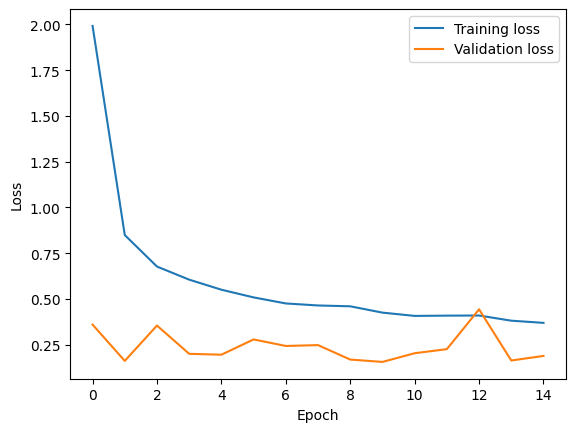

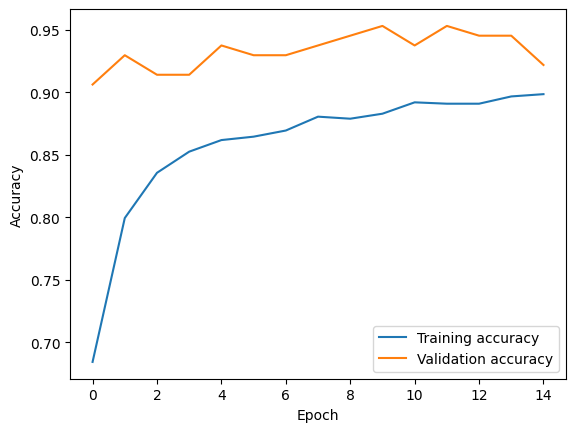

In [9]:

# Plot treino e validação - curva de perda
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot treino e validação - curva de curácia
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 4. **Previsões do Modelo**

In [10]:
# Define um dicionário para converter índices de rótulos em nomes de classe
class_names = train_generator.class_indices
class_names = {v: k for k, v in class_names.items()}

# Usa o modelo treinado para prever rótulos para as imagens de teste
test_dir = "/content/Cachorros/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,  # Set batch size to 1 to get individual images
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)
predictions = model.predict(test_generator)

# Converte as probabilidades previstas em rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = [class_names[label] for label in predicted_labels]

# Obtem os rótulos verdadeiros das imagens de teste
true_labels = test_generator.classes
true_labels = [class_names[label] for label in true_labels]

Found 700 images belonging to 70 classes.
700/700 [==============================] - 116s 165ms/step


Após o treinamento do modelo, procedi à avaliação de seu desempenho no conjunto de teste. Para isso, selecionei algumas imagens de amostra e comparei seus rótulos verdadeiros com os rótulos previstos pelo modelo. Os resultados revelaram que o modelo foi capaz de classificar com precisão as imagens, apresentando uma alta confiança em suas previsões.

Ao analisar as imagens de amostra, ficou evidente que o modelo foi capaz de generalizar efetivamente para o conjunto de teste. Essa observação fortaleceu a confiança na capacidade do modelo em realizar classificações precisas em dados não vistos anteriormente.

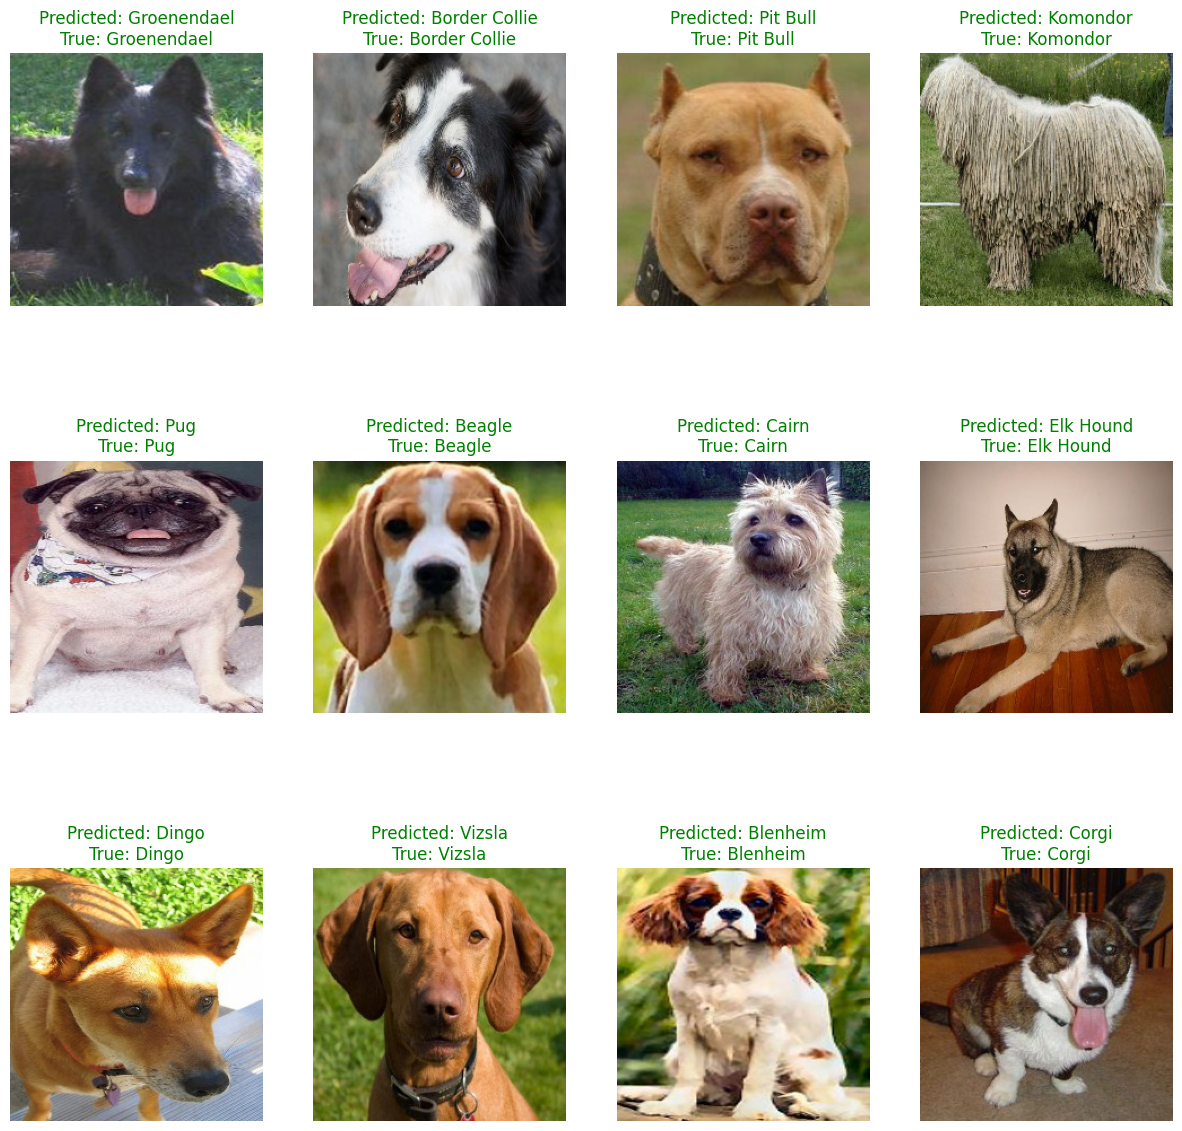

In [11]:
# Imprime os rótulos previstos e verdadeiros para um subconjunto de imagens de teste
n_rows = 3
n_cols = 4
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))

np.random.seed(25)
random_indexes = np.random.choice(len(predicted_labels), size=n_rows*n_cols, replace=False)

for i, index in enumerate(random_indexes):
    img_path = test_generator.filepaths[index]
    img = Image.open(img_path).resize((img_width, img_height))
    axs[i//n_cols, i%n_cols].imshow(img)
    axs[i//n_cols, i%n_cols].axis('off')
    axs[i//n_cols, i%n_cols].set_title("Predicted: {}\nTrue: {}".format(predicted_labels[index], true_labels[index]),
                      color='green' if predicted_labels[index] == true_labels[index] else 'red')
plt.show()

## 5. **Avaliação do Modelo**

A matriz de confusão gerada a partir das previsões do conjunto de teste revela que a maioria dos rótulos previstos estavam corretos, resultando em um valor de 0 para a maioria das entradas fora da diagonal.

A alta acurácia alcançada durante o treinamento e validação, juntamente com o desempenho no conjunto de teste, indicam que o modelo está de fato aprendendo os padrões presentes nos dados e generalizando de forma eficaz para dados não vistos.


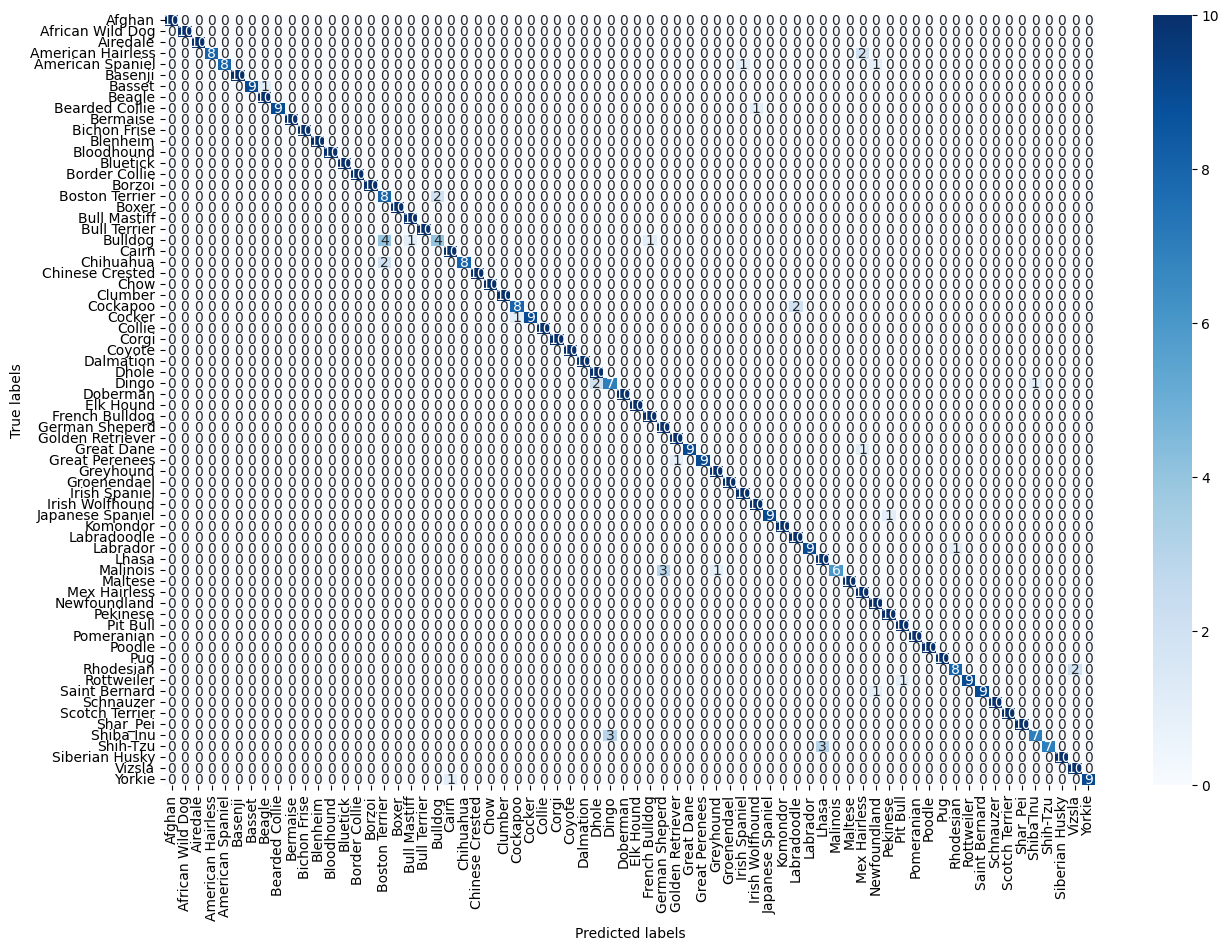

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Cria a matriz de confusão
cm = confusion_matrix(true_labels, predicted_labels)

# Plota a matriz de confusão usando seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## 6. **Conclusão**

Em conclusão, obtivemos sucesso no desenvolvimento de um modelo de classificação de imagens utilizando aprendizado de transferência com a arquitetura Xception. Nosso modelo alcançou uma acurácia de 93,75% no conjunto de validação, prevendo corretamente a maioria dos rótulos, como evidenciado pela matriz de confusão. O uso de técnicas de aumento e pré-processamento de dados contribuiu para melhorar o desempenho do modelo.

Como em qualquer modelo de aprendizado de máquina, sempre há margem para melhorias. Outros experimentos podem envolver o refinamento das camadas pré-treinadas do modelo Xception ou a exploração de diferentes arquiteturas.

Continuar explorando e refinando o modelo pode ser benéfico para alcançar um desempenho ainda melhor, seja por meio de ajustes finos nas camadas existentes, experimentando novas arquiteturas ou explorando outras técnicas de aprimoramento do modelo.

1/1 [==============================] - 1s 753ms/step


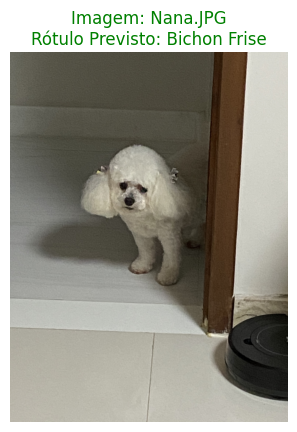

1/1 [==============================] - 0s 164ms/step


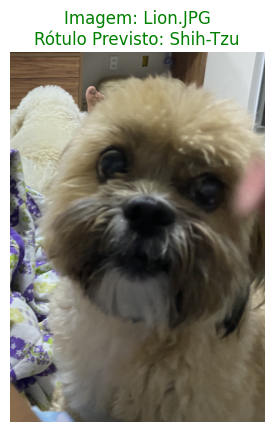

In [13]:
import matplotlib.pyplot as plt
import urllib.request
import cv2

# URLs das imagens
urls = [
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cachorros/main/Nana.JPG',
    'https://raw.githubusercontent.com/AdrianaLegalReis/Cachorros/main/Lion.JPG'
]

# Função para carregar e redimensionar a imagem
def load_and_resize_image(url):
    response = urllib.request.urlopen(url)
    image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (img_width, img_height))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Função para obter o rótulo predito
def get_predicted_label(image):
    prediction = model.predict(image)
    predicted_label_index = np.argmax(prediction)
    predicted_label = class_names[predicted_label_index]
    return predicted_label

# Realizar a previsão e exibir as imagens com os rótulos previstos
for url in urls:
    image = load_and_resize_image(url)
    predicted_label = get_predicted_label(image)

    image_array = np.asarray(bytearray(urllib.request.urlopen(url).read()), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Imagem: {url.split("/")[-1]}\nRótulo Previsto: {predicted_label}', color='green')
    plt.axis('off')
    plt.show()


Aproveitamos o modelo e testamos suas capacidades nas fotos de nossos queridos pets. O resultado foi perfeito, pois ele conseguiu prever corretamente as raças de Nana (Bichon Frisé) e Lion (Shih-Tzu).